# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [351]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df= pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#Merge dataframes into one dataframe
mouse_study_df = study_results_df.merge(mouse_metadata_df, on="Mouse ID")
mouse_study_df.head(60)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [352]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [353]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_columns = ["Mouse ID", "Timepoint"]
dup_s = mouse_study_df.duplicated(dup_columns)
dup_s.sum()
#identifying unique mouse ID's
dup_mice = mouse_study_df[dup_s]['Mouse ID'].unique()

In [355]:
#Dataframe of the duplicated mouse info
dup_mice_s = mouse_study_df["Mouse ID"].isin(dup_mice)
dup_mice_s
mouse_study_df[dup_mice_s]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [356]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[~dup_mice_s]
clean_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [357]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [358]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Used groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
sum_stats_df = pd.DataFrame ({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Standard Deviation": stdev,
    "Standard Error": sem
})
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [359]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = clean_mouse_study_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg({"mean", "median","var", "std", "sem"
    })
agg_summary_df

Tumor Volume (mm3)                                          
                            var       mean     median       std       sem
Drug Regimen                                                             
Capomulin             24.947764  40.675741  41.557809  4.994774  0.329346
Ceftamin              39.290177  52.591172  51.776157  6.268188  0.469821
Infubinol             43.128684  52.884795  51.820584  6.567243  0.492236
Ketapril              68.553577  55.235638  53.698743  8.279709  0.603860
Naftisol              66.173479  54.331565  52.509285  8.134708  0.596466
Placebo               61.168083  54.033581  52.288934  7.821003  0.581331
Propriva              43.852013  52.320930  50.446266  6.622085  0.544332
Ramicane              23.486704  40.216745  40.673236  4.846308  0.320955
Stelasyn              59.450562  54.233149  52.431737  7.710419  0.573111
Zoniferol             48.533355  53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Time Points'>

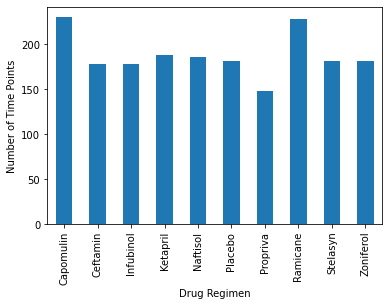

In [360]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Grouped dataset by Drug Regimen and counted the Mouse ID's
timepoint_df = clean_mouse_study_df.groupby("Drug Regimen").count()["Mouse ID"]
#Bar plotted data
timepoint_df.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "Number of Time Points")

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Zoniferol' 'Propriva' 'Placebo' 'Ceftamin']
[230 178 178 188 186 181 148 228 181 182]


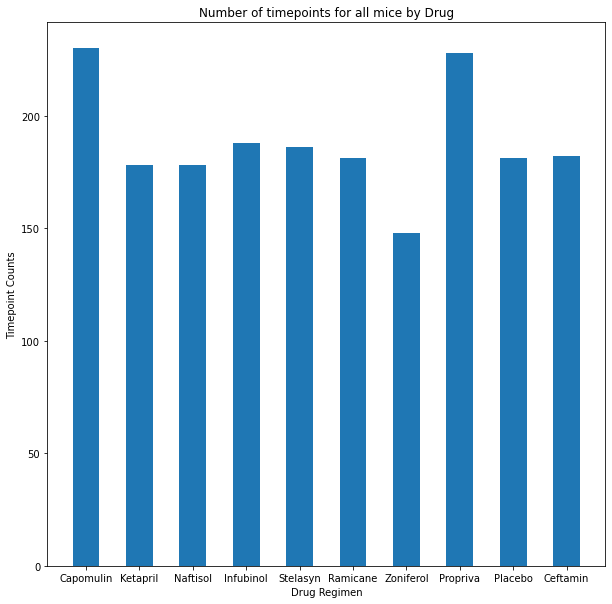

In [361]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint2 = clean_mouse_study_df.groupby("Drug Regimen").count()["Mouse ID"]
# made list of unique drug names
drugNames = clean_mouse_study_df["Drug Regimen"].unique()
#turned them into a timepoint array and a drug names array
y = np.array([timepoint2[i] for i, v in timepoint2.iteritems()])
x = np.array(drugNames)
#printed arrays
print (x)
print(y)
#Bar plotted Timepoint counts for all mice tested for each regimen.
plt.figure(figsize = (10,10))
plt.bar(x, y, .5)
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Counts')
plt.title("Number of timepoints for all mice by Drug")
plt.show()

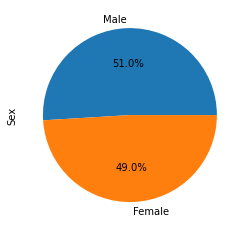

In [362]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#set up variable for counts for each sex
counts = clean_mouse_study_df.Sex.value_counts()
#pie plotted counts
counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

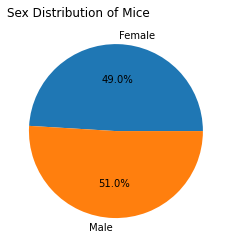

In [363]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#set up an array for mice sex counts
y = np.array([counts.Female, counts.Male])
#Pie plotted using pyplot
mylabels = ["Female", "Male"]
plt.title("Sex Distribution of Mice", loc = 'left')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [364]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_time = clean_mouse_study_df.groupby("Mouse ID").max()["Timepoint"]
#made into DataFrame
mmt_df = pd.DataFrame(mouse_max_time)
mmt_df2= mmt_df.reset_index()
mmt_df2.head(50)

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
5,a401,45
6,a411,45
7,a444,45
8,a457,10
9,a492,45


In [365]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(mmt_df2, clean_mouse_study_df, on = ["Mouse ID", "Timepoint"], how = "inner")
#checked length and dataFrame
rows = len(tumor_df.axes[0])
print (rows)
tumor_df.head(50)

248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [367]:
# Put treatments into a list for for loop (and later for plot labels)

dreg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
i = 0
for d in dreg:
    final_tumor_vol = tumor_df.loc[tumor_df["Drug Regimen"] == d, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
i+= 1

print(tumor_vol)
print(len(tumor_vol))

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
11     57.031862
13     66.0830

In [368]:
# set up subsets for each of the four drug regimens

capo = tumor_vol[0]
rami = tumor_vol[1]
infu = tumor_vol[2]
ceft = tumor_vol[3]

In [393]:
# Determine outliers using upper and lower bounds
#set up lower and upper quantiles
lwr_capo = capo.quantile(q=.25)
upr_capo = capo.quantile(q=.75)
lwr_rami = rami.quantile(q=.25)
upr_rami = rami.quantile(q=.75)
lwr_infu = infu.quantile(q=.25)
upr_infu = infu.quantile(q=.75)
lwr_ceft = ceft.quantile(q=.25)
upr_ceft = ceft.quantile(q=.75)

#calculated upper and lower bounds
capo_ulim = upr_capo + 1.5*(upr_capo-lwr_capo)
capo_llim = lwr_capo - 1.5*(upr_capo-lwr_capo)

rami_ulim = upr_rami + 1.5*(upr_rami-lwr_rami)
rami_llim = lwr_rami - 1.5*(upr_rami-lwr_rami)

infu_ulim = upr_infu + 1.5*(upr_infu-lwr_infu)
infu_llim = lwr_infu - 1.5*(upr_infu-lwr_infu)

ceft_ulim = upr_ceft + 1.5*(upr_ceft-lwr_ceft)
ceft_llim = lwr_ceft - 1.5*(upr_ceft-lwr_ceft)

print("Capomulin: ", upr_capo, ", ", capo_ulim,", ", capo_llim, ", ", lwr_capo)
print("Ramicane: ", upr_rami, ", ", rami_ulim, ", ", rami_llim, ", ",lwr_rami)
print("Infubinol:", upr_infu, ", ", infu_ulim, ", ",infu_llim,", ", lwr_infu)
print("Ceftamin:", upr_ceft, ", ", ceft_ulim, ", ", ceft_llim, ", ", lwr_ceft)


Capomulin:  40.1592203 ,  51.83201549 ,  20.70456164999999 ,  32.37735684
Ramicane:  40.65900627 ,  54.30681135 ,  17.912664470000003 ,  31.56046955
Infubinol: 65.52574285 ,  82.74144559000001 ,  36.83290494999999 ,  54.04860769
Ceftamin: 64.29983003 ,  87.66645829999999 ,  25.355449580000002 ,  48.72207785


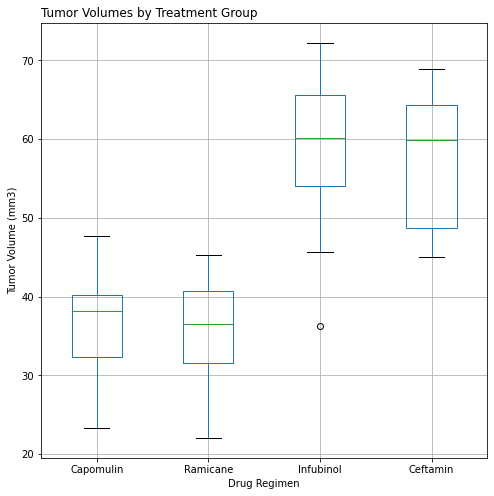

In [370]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#set up tumor volume DataFrame for all treatment groups
drug_tumor_df = pd.DataFrame({
    "Capomulin": capo,
    "Ramicane": rami,
    "Infubinol": infu,
    "Ceftamin": ceft,
})
#Box plotted data
plt.figure(figsize = (8,8))
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volumes by Treatment Group", loc = 'left')
boxplot = drug_tumor_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

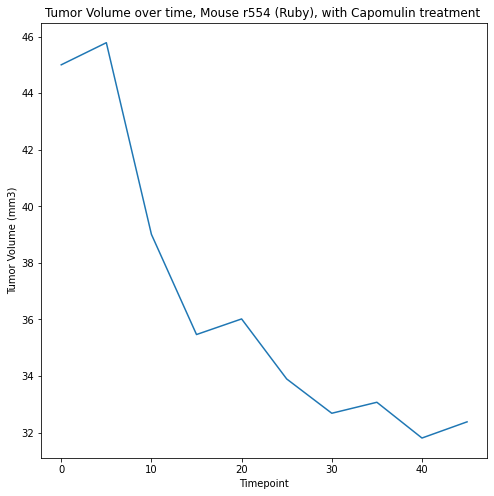

In [396]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

r554lnplt = clean_mouse_study_df.loc[clean_mouse_study_df["Mouse ID"] == "r554"]
r554lnplt = r554lnplt.set_index("Timepoint")
plt.figure(figsize = (8,8))
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume over time, Mouse r554 (Ruby), with Capomulin treatment ")
r554lnplt["Tumor Volume (mm3)"].plot()
plt.show()

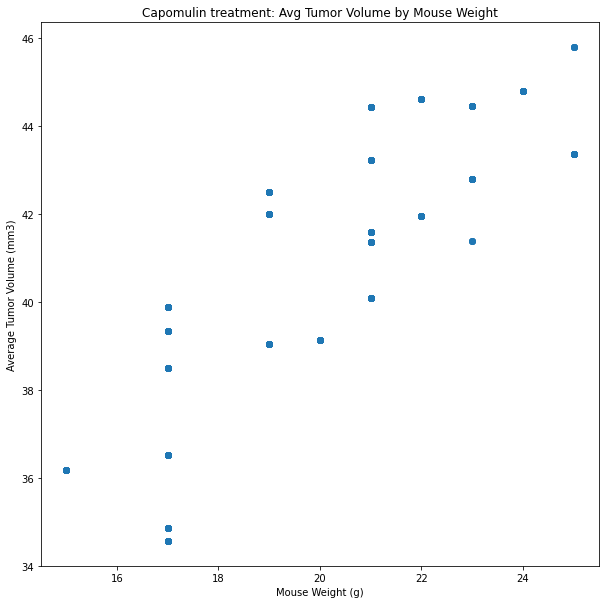

In [397]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Made a database of all mice treated with Capomulin.
capo_mse = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]

# make dataFrame Grouped by Mouse ID and Average Tumor Volume
tvol_avg = clean_mouse_study_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Sort Values and Reset index
tvol_avg.sort_values().reset_index()

#merge avg tumor volume dataframe with Capomulin Treatment dataFrame
merge_capo_data = pd.merge(capo_mse, tvol_avg, on = "Mouse ID", how = "inner")

#rename one column to Average Tumor Volume
merge_capo2 = merge_capo_data.rename(columns={'Tumor Volume (mm3)_y':'Average Tumor Volume'})
merge_capo2

#plot Mouse Weight and Average Tumor Volume for mice given Capomulin treatment
x = merge_capo2["Weight (g)"]
y = merge_capo2["Average Tumor Volume"]
plt.figure(figsize = (10,10))
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin treatment: Avg Tumor Volume by Mouse Weight")
plt.scatter(x, y)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83


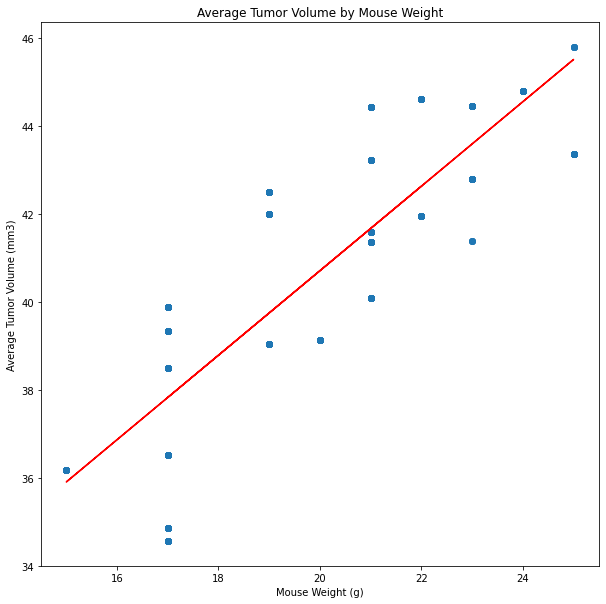

In [409]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Set up x and y values
x = merge_capo2["Weight (g)"]
y = merge_capo2["Average Tumor Volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#List of predicted y values
regress_values = x * slope + intercept 
#Get string of line regression line
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))) 
#plot the data
plt.figure(figsize = (10,10))
#tried to add in regression equation
plt.plot.annotate(line_eq,(6,10),fontsize=15,color="red") 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume by Mouse Weight")
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()
